In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dates = pd.date_range(start='2025-01-01', periods=100, freq='D')

precios = np.random.lognormal(mean=0.001, sigma=0.02, size=len(dates))*100

In [9]:
#Construir el dataframe de series temporales
df = pd.DataFrame({'Fecha': dates, 'Precio_Cierre': precios})
#Setear el indice del dataframe
df.set_index('Fecha', inplace=True)
#Mostrar las primeras 5 filas del dataframe
df.head()

,Precio_Cierre
Fecha,
2025-01-01,99.176781
2025-01-02,95.626880
2025-01-03,99.043001
2025-01-04,98.720349
2025-01-05,98.821755


In [10]:
#Calculo de estadisticas basicas de una serie temporal
df.describe()

,Precio_Cierre
count,100.000000
mean,100.010831
std,1.939043
min,95.626880
25%,98.676211
50%,99.807733
75%,101.524963
max,105.971978


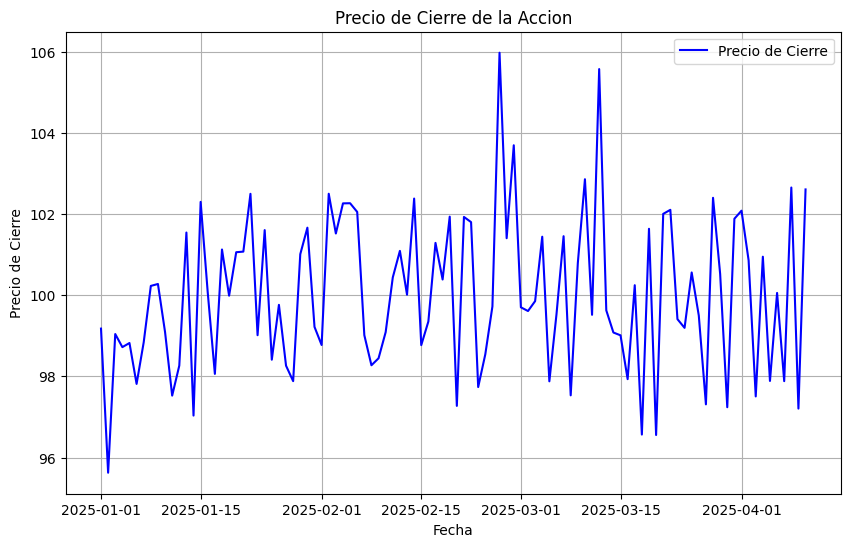

In [11]:
#Visualizacion de una serie temporal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre', color='blue')
plt.title('Precio de Cierre de la Accion')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()

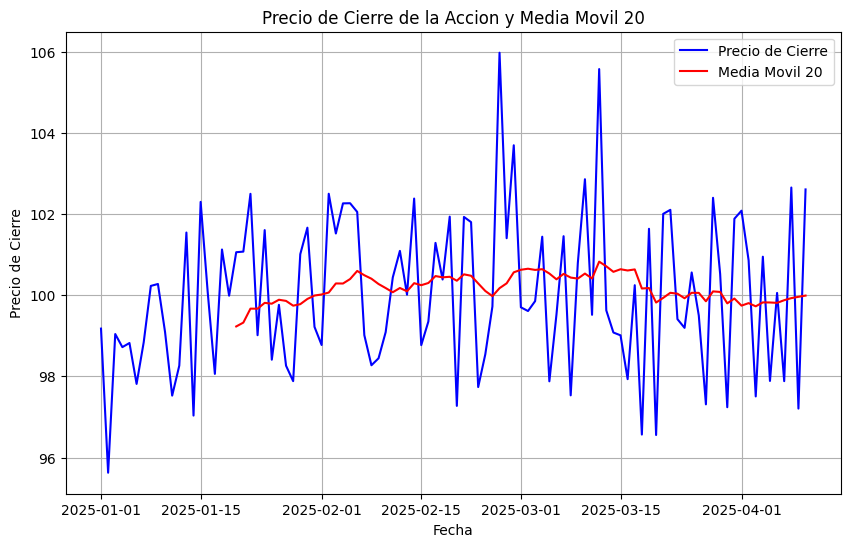

In [13]:
#Calcular la media moviles para entender la tendencia de la serie temporal
#Suavisar los datos para eliminar el ruido

df['Media_Movil_20'] = df['Precio_Cierre'].rolling(window=20).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre', color='blue')
plt.plot(df.index, df['Media_Movil_20'], label='Media Movil 20', color='red')
plt.title('Precio de Cierre de la Accion y Media Movil 20')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()


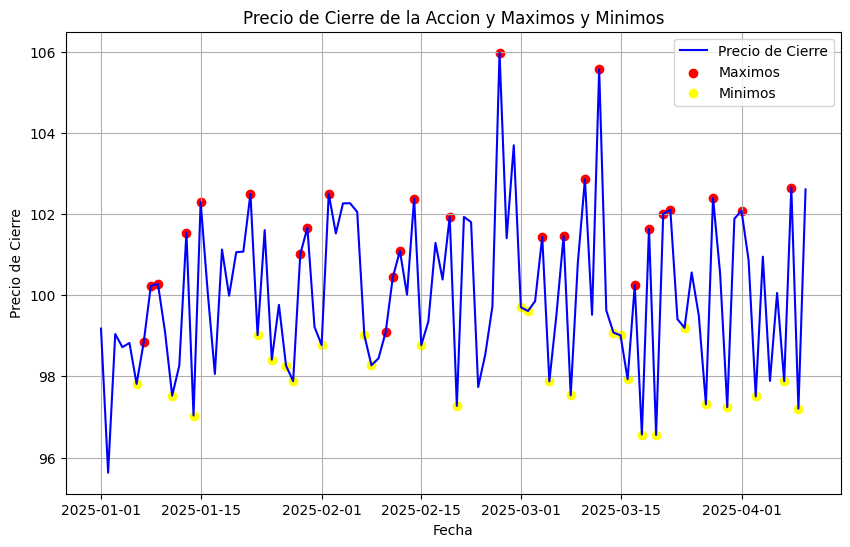

In [17]:
#Deteccion de tendencias y patrones en series temporales
df['Maximos']= df['Precio_Cierre'][(df['Precio_Cierre']>df['Precio_Cierre'].shift(1)) & (df['Precio_Cierre']>df['Precio_Cierre'].shift(2)) & (df['Precio_Cierre']>df['Precio_Cierre'].shift(3))]
df['Minimos']= df['Precio_Cierre'][(df['Precio_Cierre']<df['Precio_Cierre'].shift(1)) & (df['Precio_Cierre']<df['Precio_Cierre'].shift(2)) & (df['Precio_Cierre']<df['Precio_Cierre'].shift(3))]

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre', color='blue')
plt.scatter(df.index, df['Maximos'], label='Maximos', color='red')
plt.scatter(df.index, df['Minimos'], label='Minimos', color='yellow')
plt.title('Precio de Cierre de la Accion y Maximos y Minimos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()
